In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [7]:

data_path = "/content/cpcb_dly_aq_tamil_nadu-2014.csv"
df = pd.read_csv(data_path)


In [8]:

df.replace("NA", float('nan'), inplace=True)


In [9]:
# Display the first few rows of the DataFrame
print(df.head())

# Get summary statistics for numerical columns
print(df.describe())


   Stn Code Sampling Date       State City/Town/Village/Area  \
0        38      01-02-14  Tamil Nadu                Chennai   
1        38      01-07-14  Tamil Nadu                Chennai   
2        38      21-01-14  Tamil Nadu                Chennai   
3        38      23-01-14  Tamil Nadu                Chennai   
4        38      28-01-14  Tamil Nadu                Chennai   

                     Location of Monitoring Station  \
0  Kathivakkam, Municipal Kalyana Mandapam, Chennai   
1  Kathivakkam, Municipal Kalyana Mandapam, Chennai   
2  Kathivakkam, Municipal Kalyana Mandapam, Chennai   
3  Kathivakkam, Municipal Kalyana Mandapam, Chennai   
4  Kathivakkam, Municipal Kalyana Mandapam, Chennai   

                                    Agency Type of Location   SO2   NO2  \
0  Tamilnadu State Pollution Control Board  Industrial Area  11.0  17.0   
1  Tamilnadu State Pollution Control Board  Industrial Area  13.0  17.0   
2  Tamilnadu State Pollution Control Board  Industrial Area

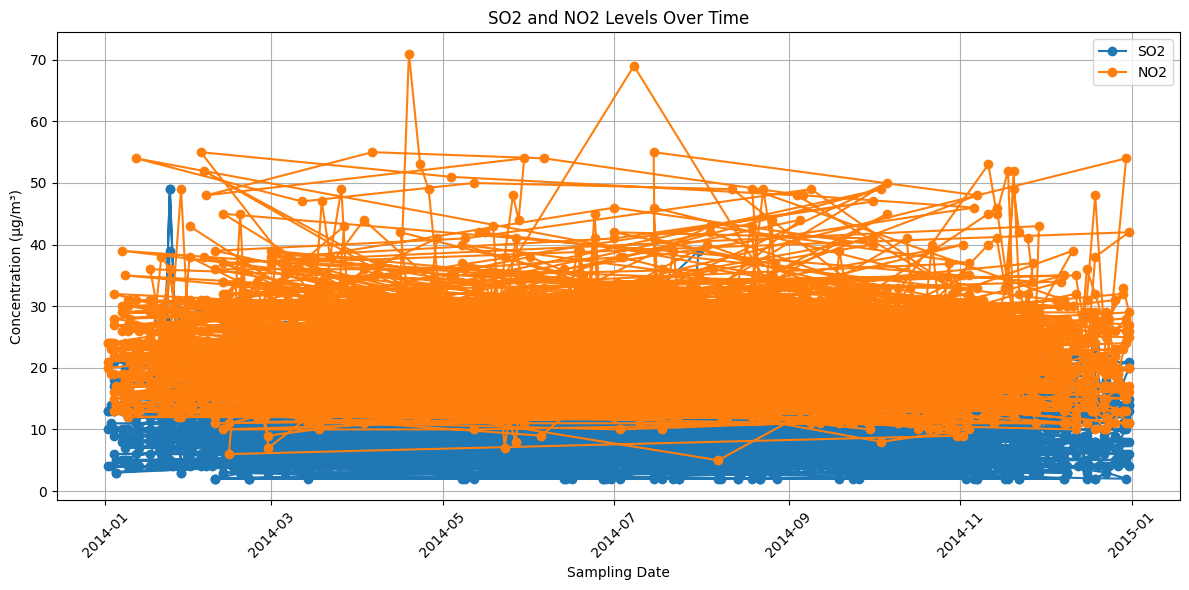

In [10]:
# Convert 'Sampling Date' to a datetime object for time series analysis
df['Sampling Date'] = pd.to_datetime(df['Sampling Date'], format='%d-%m-%y')

# Plot SO2 and NO2 levels over time
plt.figure(figsize=(12, 6))
plt.plot(df['Sampling Date'], df['SO2'], label='SO2', marker='o')
plt.plot(df['Sampling Date'], df['NO2'], label='NO2', marker='o')
plt.title('SO2 and NO2 Levels Over Time')
plt.xlabel('Sampling Date')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


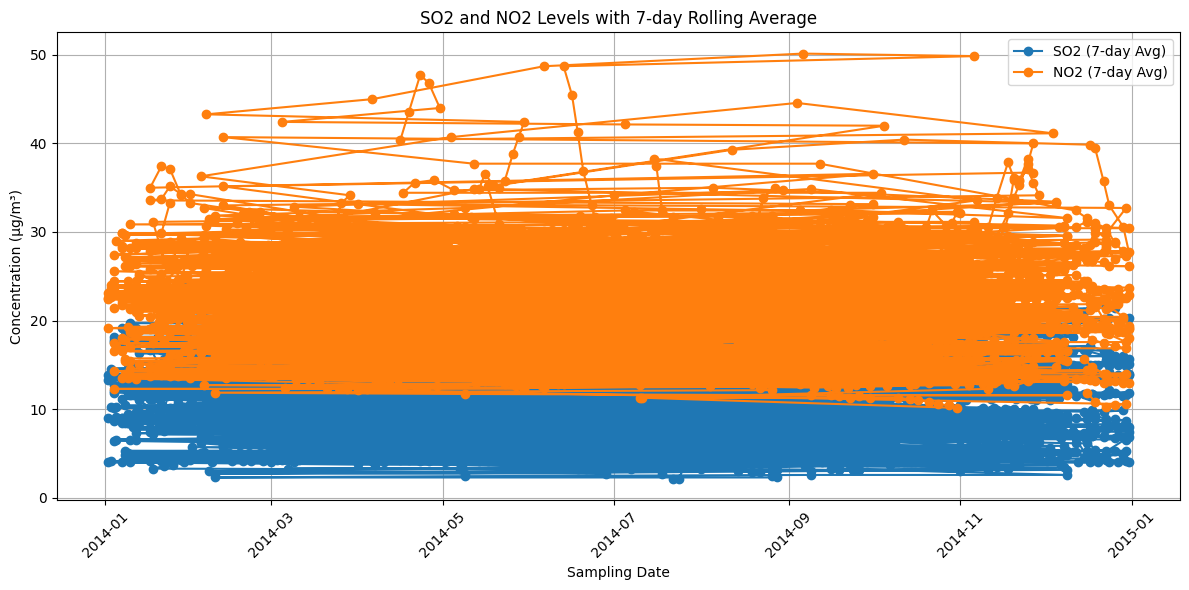

In [11]:
# Calculate the 7-day rolling average for SO2 and NO2
df['SO2_7day_avg'] = df['SO2'].rolling(window=7).mean()
df['NO2_7day_avg'] = df['NO2'].rolling(window=7).mean()

# Plot the 7-day rolling averages
plt.figure(figsize=(12, 6))
plt.plot(df['Sampling Date'], df['SO2_7day_avg'], label='SO2 (7-day Avg)', marker='o')
plt.plot(df['Sampling Date'], df['NO2_7day_avg'], label='NO2 (7-day Avg)', marker='o')
plt.title('SO2 and NO2 Levels with 7-day Rolling Average')
plt.xlabel('Sampling Date')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


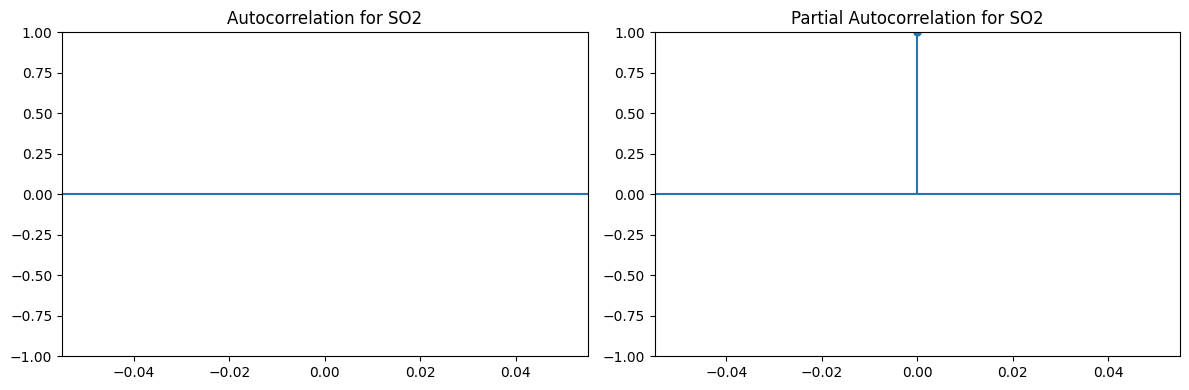

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation and Partial Autocorrelation Plots for SO2
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plot_acf(df['SO2'], lags=30, ax=plt.gca())
plt.title('Autocorrelation for SO2')

plt.subplot(1, 2, 2)
plot_pacf(df['SO2'], lags=30, ax=plt.gca())
plt.title('Partial Autocorrelation for SO2')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


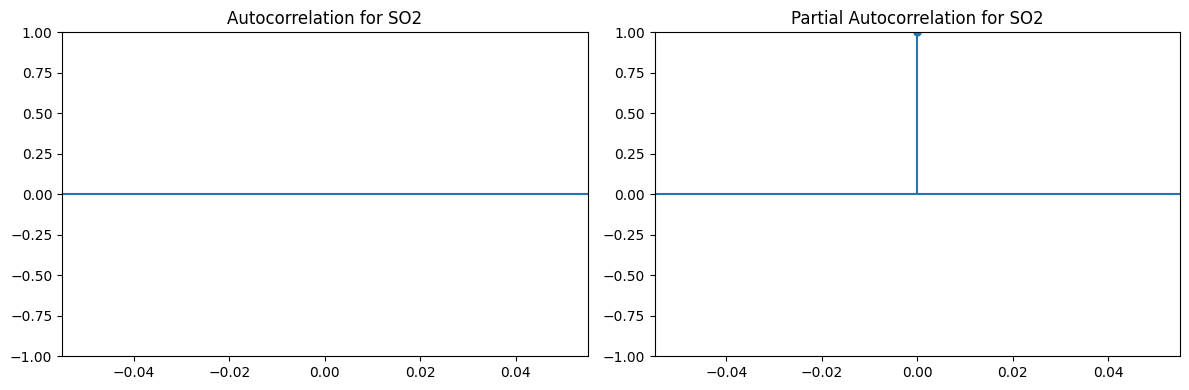

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation and Partial Autocorrelation Plots for SO2
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plot_acf(df['SO2'], lags=30, ax=plt.gca())
plt.title('Autocorrelation for SO2')

plt.subplot(1, 2, 2)
plot_pacf(df['SO2'], lags=30, ax=plt.gca())
plt.title('Partial Autocorrelation for SO2')

plt.tight_layout()
plt.show()


In [ ]:
!pip install statsmodels


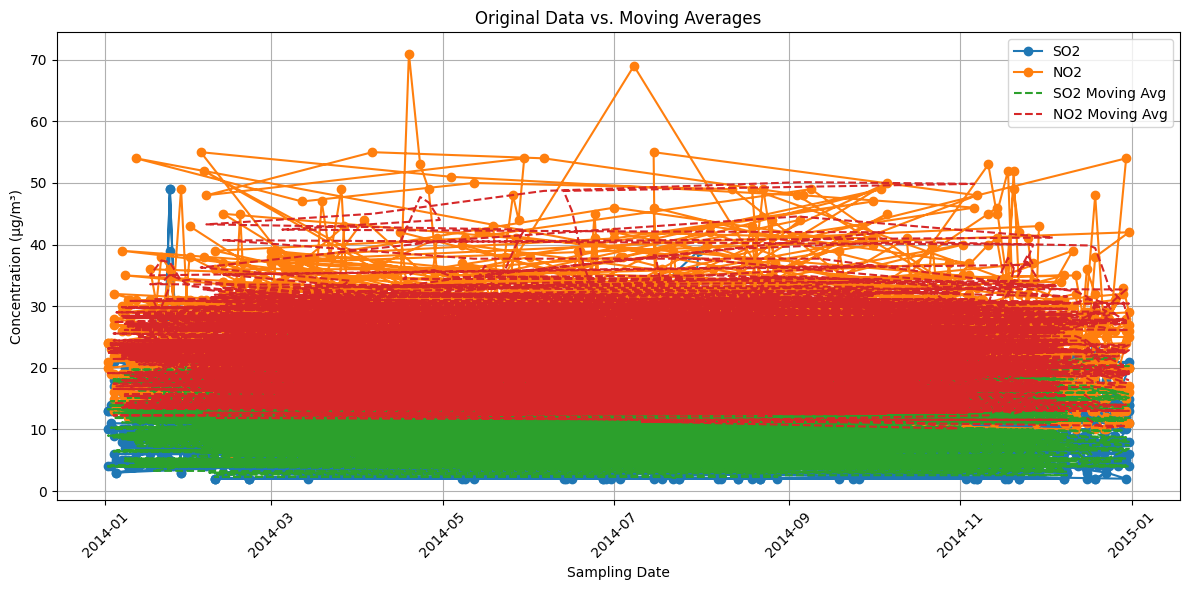

In [17]:
# Calculate moving averages for SO2 and NO2
window_size = 7  # Adjust the window size as needed
df['SO2_MA'] = df['SO2'].rolling(window=window_size).mean()
df['NO2_MA'] = df['NO2'].rolling(window=window_size).mean()

# Plot the original data and moving averages
plt.figure(figsize=(12, 6))
plt.plot(df['Sampling Date'], df['SO2'], label='SO2', marker='o')
plt.plot(df['Sampling Date'], df['NO2'], label='NO2', marker='o')
plt.plot(df['Sampling Date'], df['SO2_MA'], label='SO2 Moving Avg', linestyle='--')
plt.plot(df['Sampling Date'], df['NO2_MA'], label='NO2 Moving Avg', linestyle='--')
plt.title('Original Data vs. Moving Averages')
plt.xlabel('Sampling Date')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
!pip install keras
!pip install scikit-learn


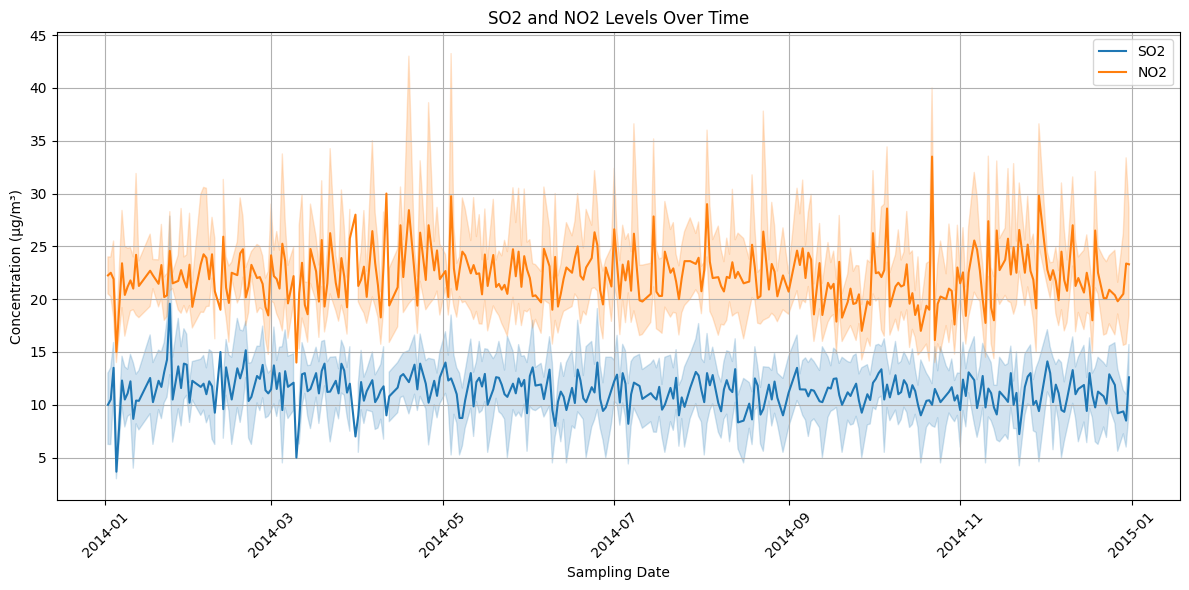

Mean SO2: 11.50 µg/m³
Mean NO2: 22.14 µg/m³
Standard Deviation SO2: 5.05
Standard Deviation NO2: 7.13


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read your CSV data
data = pd.read_csv("/content/cpcb_dly_aq_tamil_nadu-2014.csv")

# Convert 'Sampling Date' to datetime
data['Sampling Date'] = pd.to_datetime(data['Sampling Date'], format='%d-%m-%y')

# Basic Data Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x='Sampling Date', y='SO2', data=data, label='SO2')
sns.lineplot(x='Sampling Date', y='NO2', data=data, label='NO2')
plt.title('SO2 and NO2 Levels Over Time')
plt.xlabel('Sampling Date')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Basic Statistics
so2_mean = data['SO2'].mean()
no2_mean = data['NO2'].mean()
so2_std = data['SO2'].std()
no2_std = data['NO2'].std()

print(f"Mean SO2: {so2_mean:.2f} µg/m³")
print(f"Mean NO2: {no2_mean:.2f} µg/m³")
print(f"Standard Deviation SO2: {so2_std:.2f}")
print(f"Standard Deviation NO2: {no2_std:.2f}")


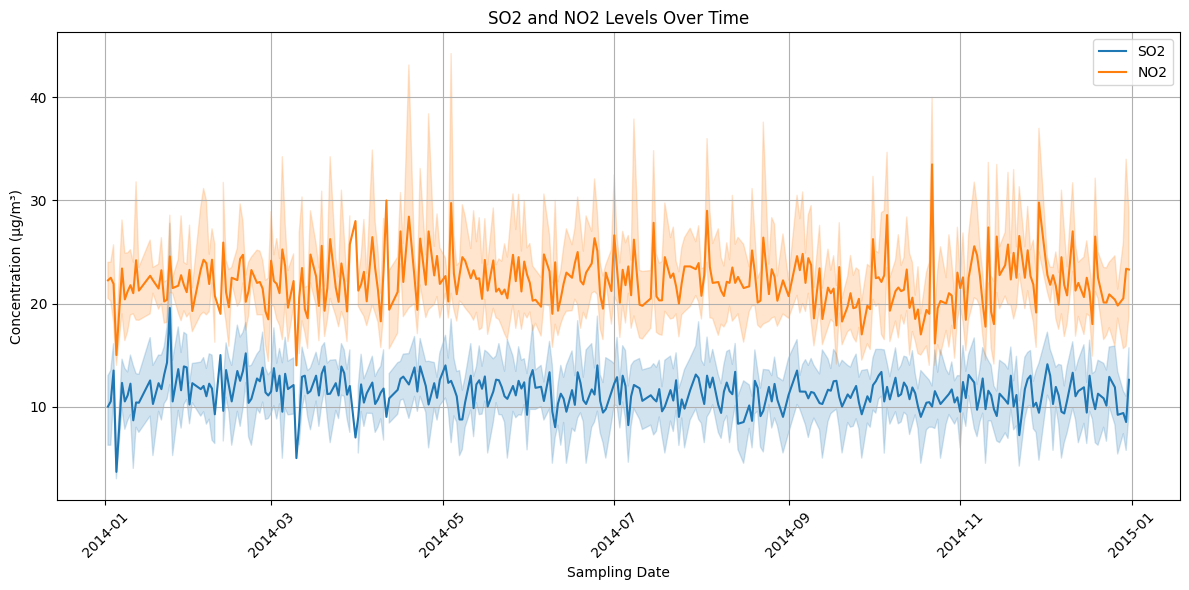

Mean SO2: 11.50 µg/m³
Mean NO2: 22.14 µg/m³
Standard Deviation SO2: 5.05
Standard Deviation NO2: 7.13


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV data (replace 'your_data.csv' with the actual file path)
data_path = "/content/cpcb_dly_aq_tamil_nadu-2014.csv"
df = pd.read_csv(data_path)

# Convert 'Sampling Date' to a datetime object
df['Sampling Date'] = pd.to_datetime(df['Sampling Date'], format='%d-%m-%y')

# Basic Data Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x='Sampling Date', y='SO2', data=df, label='SO2')
sns.lineplot(x='Sampling Date', y='NO2', data=df, label='NO2')
plt.title('SO2 and NO2 Levels Over Time')
plt.xlabel('Sampling Date')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary Statistics for SO2 and NO2
so2_mean = df['SO2'].mean()
no2_mean = df['NO2'].mean()
so2_std = df['SO2'].std()
no2_std = df['NO2'].std()

print(f"Mean SO2: {so2_mean:.2f} µg/m³")
print(f"Mean NO2: {no2_mean:.2f} µg/m³")
print(f"Standard Deviation SO2: {so2_std:.2f}")
print(f"Standard Deviation NO2: {no2_std:.2f}")


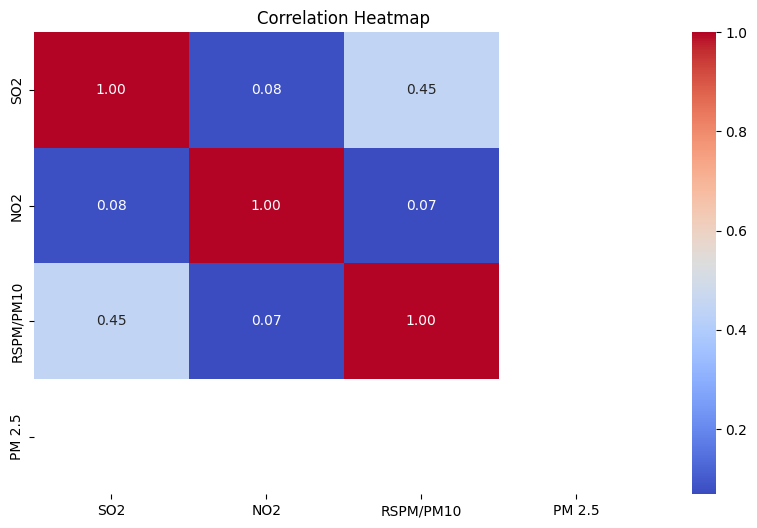

In [37]:
correlation_matrix = df[['SO2', 'NO2', 'RSPM/PM10', 'PM 2.5']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


<ipython-input-41-3812cd2d6952>:12: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=df['Sampling Date'].max(), periods=forecast_steps, closed='right')


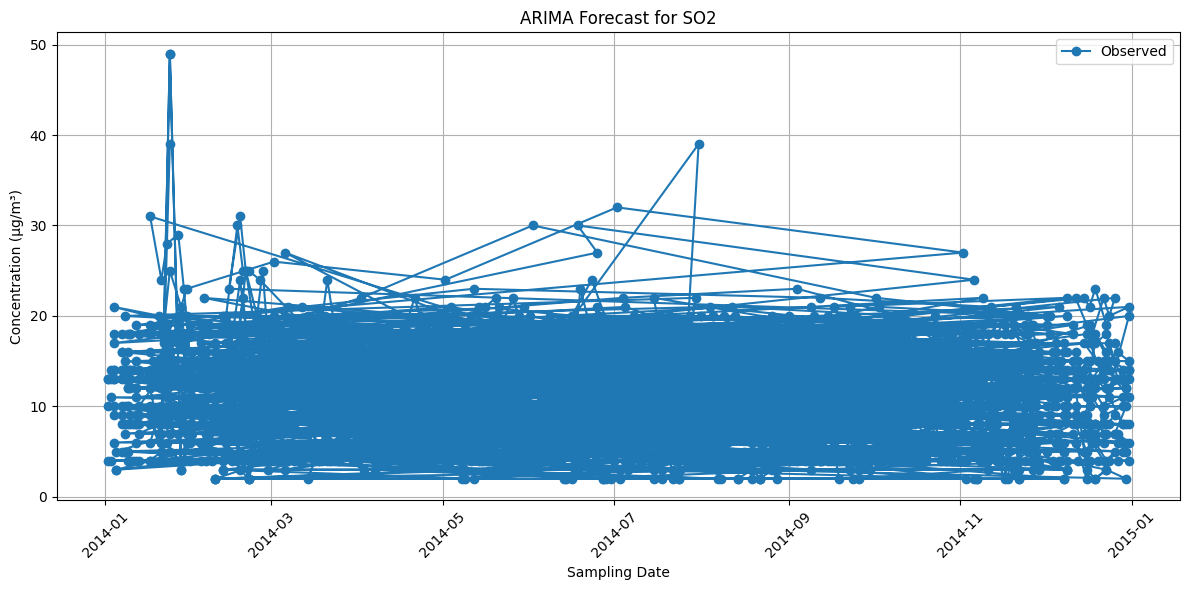

In [41]:
# Fit an ARIMA model for SO2
model = ARIMA(df['SO2'], order=(1, 1, 1))
results = model.fit()

# Forecast SO2 levels for the next 30 days
forecast_steps = 30
forecast = results.forecast(steps=forecast_steps)

# Plot the observed data and forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Sampling Date'], df['SO2'], label='Observed', marker='o')
forecast_index = pd.date_range(start=df['Sampling Date'].max(), periods=forecast_steps, closed='right')
plt.title('ARIMA Forecast for SO2')
plt.xlabel('Sampling Date')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


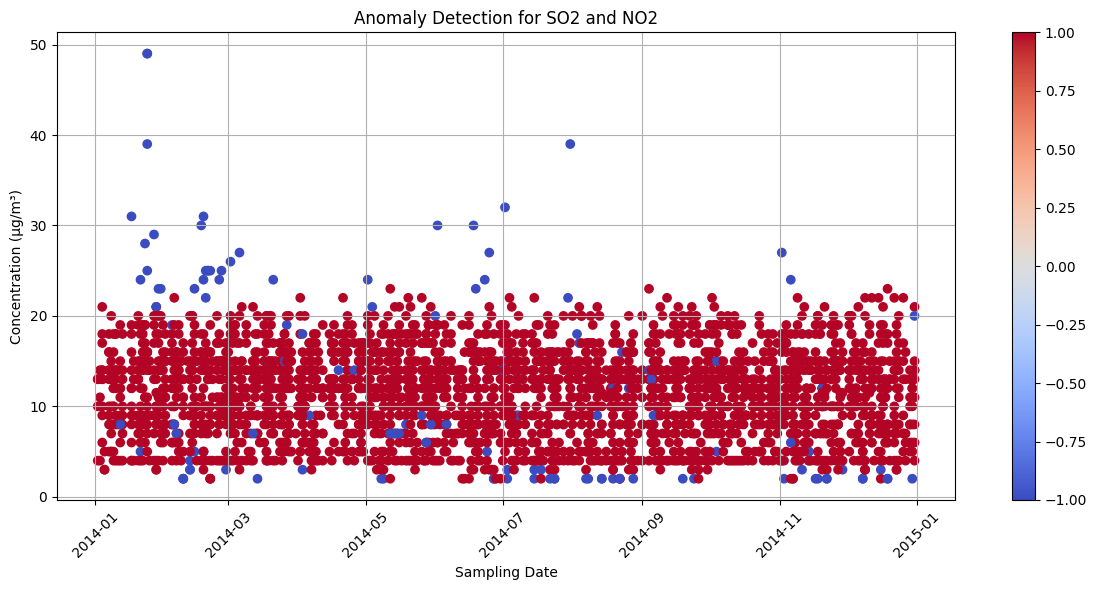

In [48]:
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer

# Impute missing values with the mean or any other strategy that suits your data
imputer = SimpleImputer(strategy='mean')
df[['SO2', 'NO2']] = imputer.fit_transform(df[['SO2', 'NO2']])

# Train the Isolation Forest model
clf = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly'] = clf.fit_predict(df[['SO2', 'NO2']])


# Visualize anomalies
plt.figure(figsize=(12, 6))
plt.scatter(df['Sampling Date'], df['SO2'], c=df['Anomaly'], cmap='coolwarm', marker='o')
plt.title('Anomaly Detection for SO2 and NO2')
plt.xlabel('Sampling Date')
plt.ylabel('Concentration (µg/m³)')
plt.colorbar()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='SO2', ylabel='NO2'>

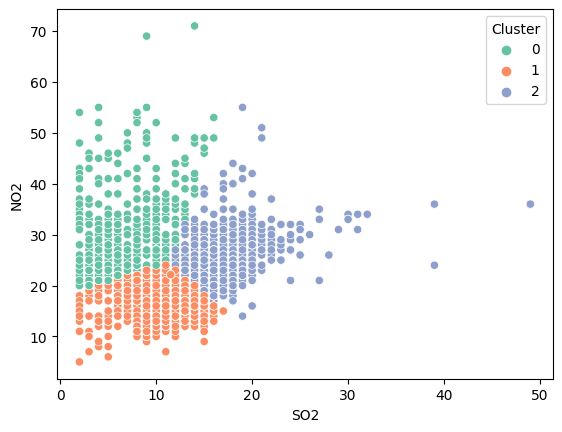

In [49]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['SO2', 'NO2']])

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize clusters
sns.scatterplot(data=df, x='SO2', y='NO2', hue='Cluster', palette='Set2')


Text(0.5, 1.0, 'PCA Analysis')

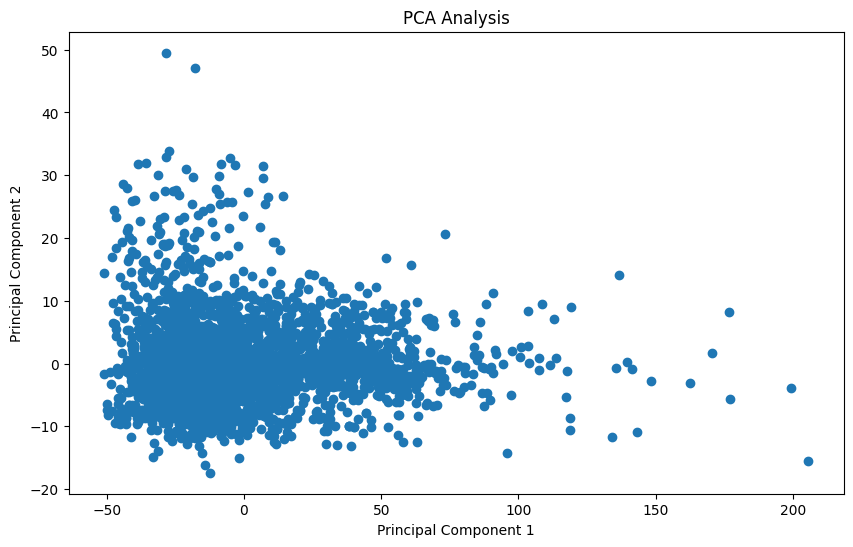

In [51]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Impute missing values with the mean or any other strategy that suits your data
imputer = SimpleImputer(strategy='mean')
pca_data = imputer.fit_transform(df[columns_to_analyze])

# Perform PCA on the imputed data
pca = PCA(n_components=2)
principal_components = pca.fit_transform(pca_data)

# Visualize the data in the reduced feature space
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Analysis')


In [54]:
!pip install tslearn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 369.8/369.8 kB 5.8 MB/s eta 0:00:00


78.815 --> 51.994 --> 48.770 --> 47.646 --> 47.508 --> 47.508 --> 


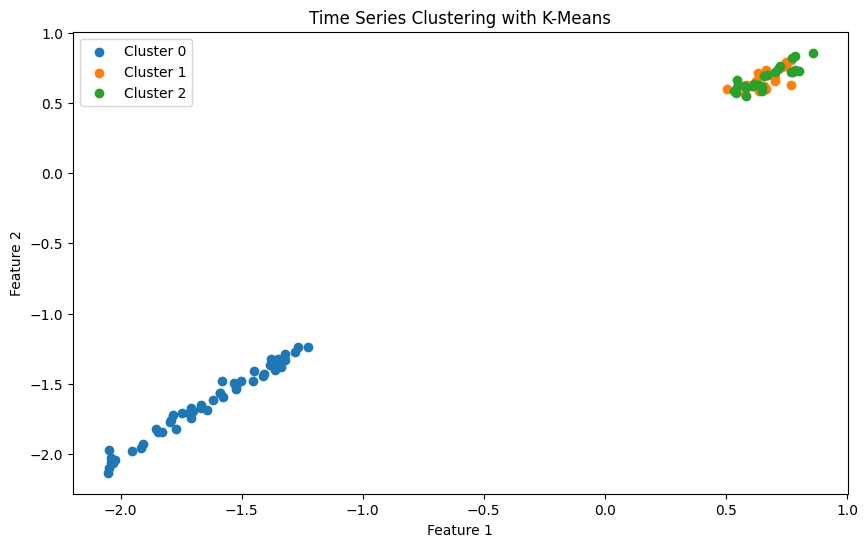

In [56]:
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans
import matplotlib.pyplot as plt

# Load a sample time series dataset (e.g., "Trace" dataset)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")

# Standardize the time series data
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)

# Perform time series clustering using K-Means
n_clusters = 3
model = TimeSeriesKMeans(n_clusters=n_clusters, verbose=True, random_state=0)
y_pred = model.fit_predict(X_train)

# Visualize the clusters (example plot, adapt for your specific data)
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    plt.scatter(X_train[y_pred == cluster, 0, :], X_train[y_pred == cluster, 1, :], label=f'Cluster {cluster}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Time Series Clustering with K-Means')
plt.legend()
plt.show()

In [61]:
!pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.9 MB/s eta 0:00:00


In [64]:
# 1. Time Series Analysis - Convert 'Sampling Date' to a datetime object
df['Sampling Date'] = pd.to_datetime(df['Sampling Date'], format='%d-%m-%y')

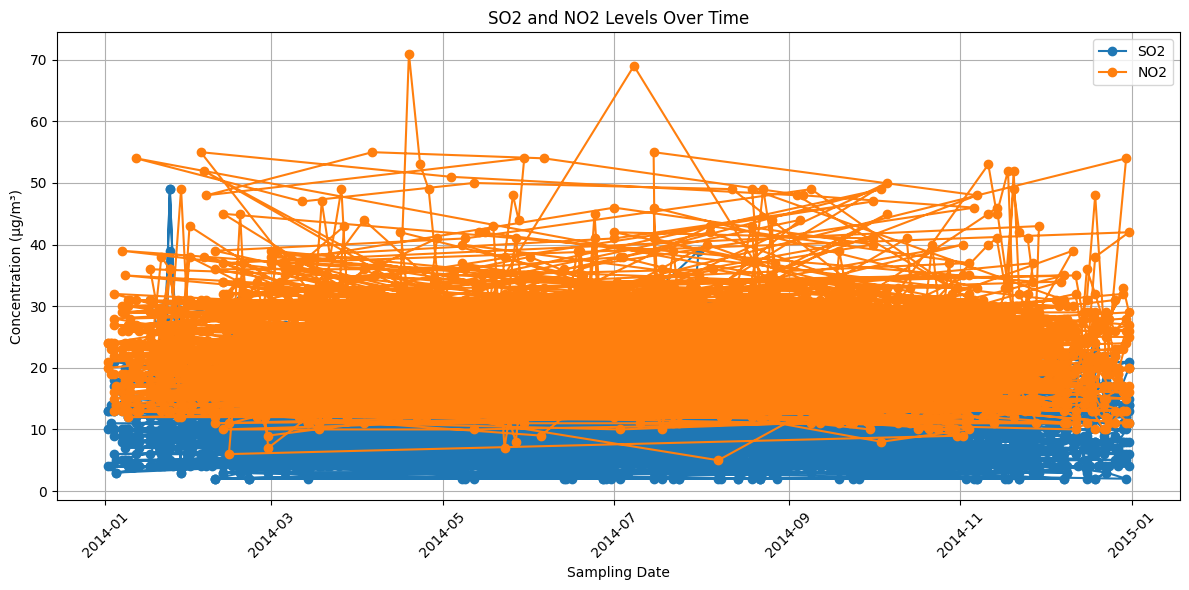

<Figure size 1200x600 with 0 Axes>

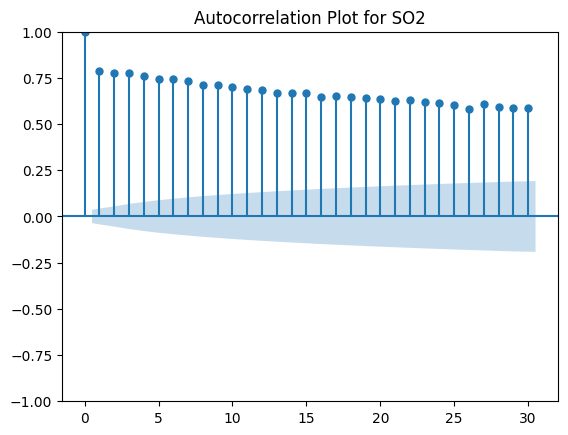

<Figure size 1200x600 with 0 Axes>

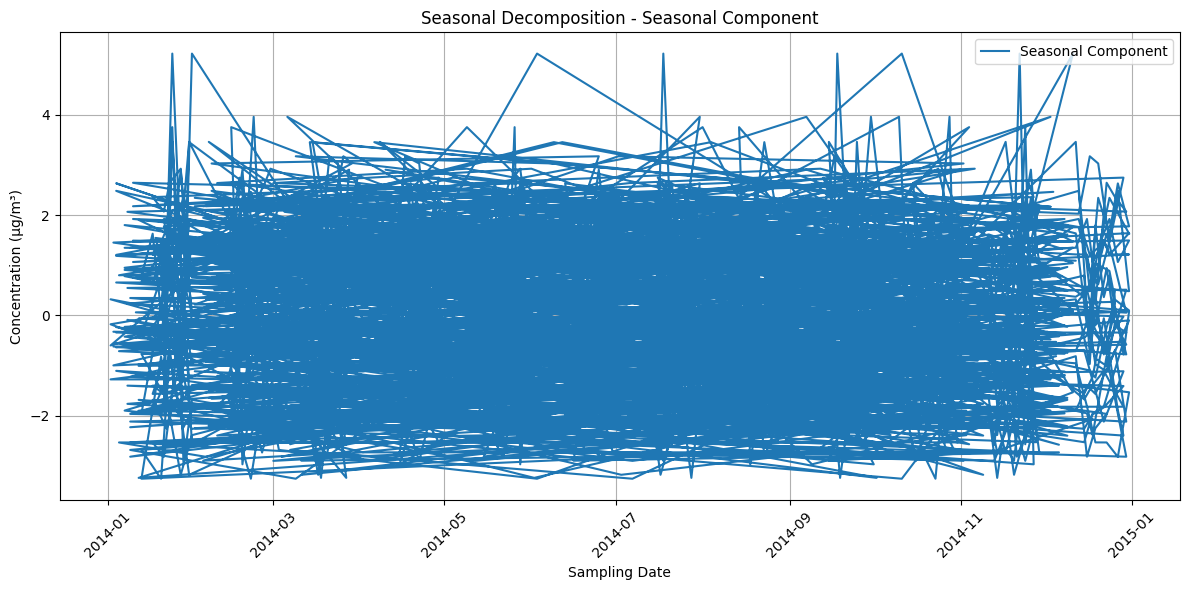

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


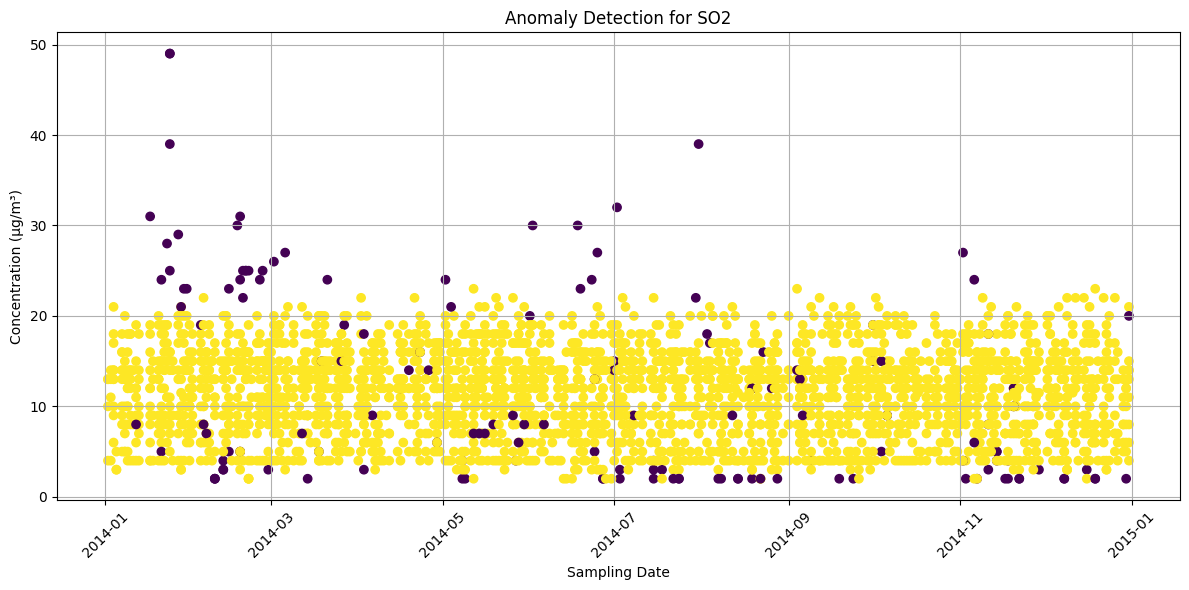

In [66]:
# 1. Time Series Analysis - Convert 'Sampling Date' to a datetime object
df['Sampling Date'] = pd.to_datetime(df['Sampling Date'], format='%d-%m-%y')

# 2. Time Series Plot - Plot SO2 and NO2 levels over time
plt.figure(figsize=(12, 6))
plt.plot(df['Sampling Date'], df['SO2'], label='SO2', marker='o')
plt.plot(df['Sampling Date'], df['NO2'], label='NO2', marker='o')
plt.title('SO2 and NO2 Levels Over Time')
plt.xlabel('Sampling Date')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Autocorrelation and Partial Autocorrelation Plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))
plot_acf(df['SO2'], lags=30)
plt.title('Autocorrelation Plot for SO2')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['SO2'], lags=30)
plt.title('Partial Autocorrelation Plot for SO2')
plt.show()

# 4. Seasonal Decomposition and Trend Analysis
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['SO2'], model='additive', period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# 5. ARIMA Model - Fit an ARIMA model for SO2
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['SO2'], order=(1, 1, 1))
results = model.fit()

# 6. ARIMA Forecast - Forecast SO2 levels for the next 30 days
forecast_steps = 30
forecast = results.get_forecast(steps=forecast_steps)


# 8. Seasonal Decomposition Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Sampling Date'], seasonal, label='Seasonal Component')
plt.title('Seasonal Decomposition - Seasonal Component')
plt.xlabel('Sampling Date')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 9. Outlier Detection - Use Isolation Forest for anomaly detection
from sklearn.ensemble import IsolationForest
clf = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly'] = clf.fit_predict(df[['SO2', 'NO2']])

# 10. Anomaly Visualization - Visualize anomalies
plt.figure(figsize=(12, 6))
plt.scatter(df['Sampling Date'], df['SO2'], c=df['Anomaly'], cmap='viridis')
plt.title('Anomaly Detection for SO2')
plt.xlabel('Sampling Date')
plt.ylabel('Concentration (µg/m³)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [67]:
!pip install pandas matplotlib seaborn scikit-learn geopandas tslearn statsmodels


In [69]:
# 12. Clustering - Perform K-Means clustering on SO2 and NO2 levels
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(df[['SO2', 'NO2']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


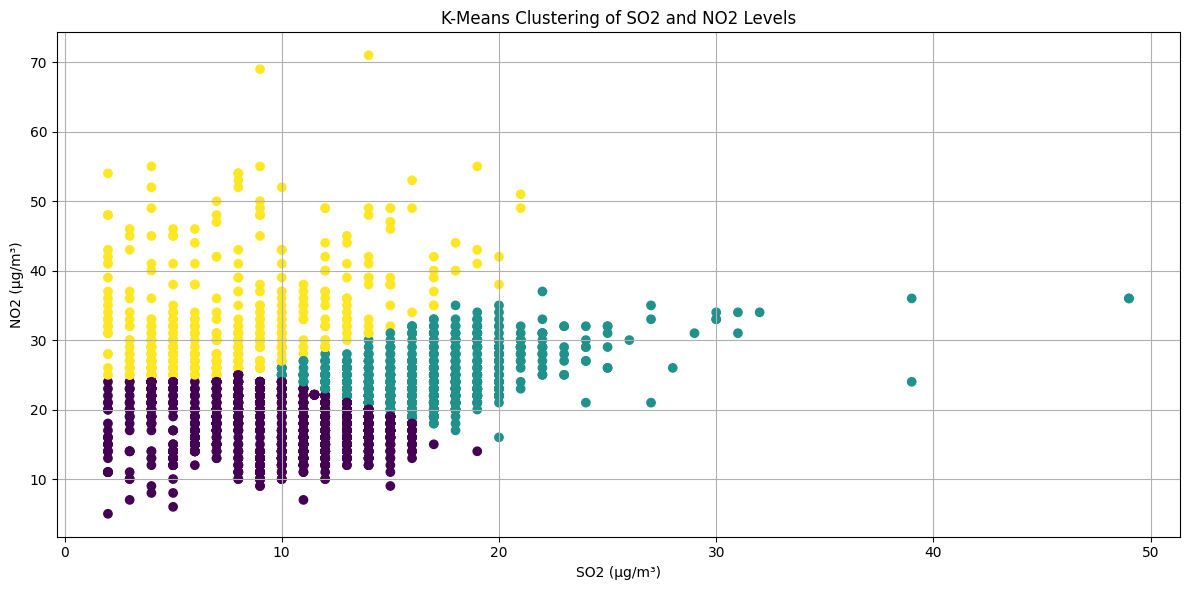

In [70]:
# 13. Cluster Visualization - Visualize the clusters on a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['SO2'], df['NO2'], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering of SO2 and NO2 Levels')
plt.xlabel('SO2 (µg/m³)')
plt.ylabel('NO2 (µg/m³)')
plt.grid(True)
plt.tight_layout()
plt.show()

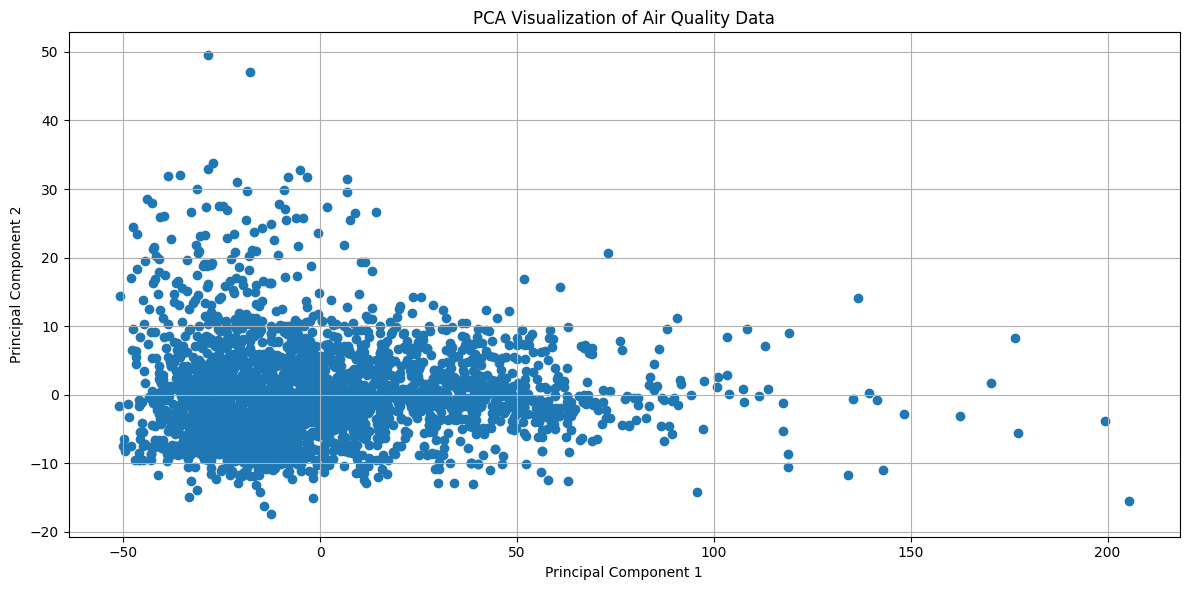

In [72]:

# 15. PCA Visualization - Visualize the data in reduced feature space
plt.figure(figsize=(12, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.title('PCA Visualization of Air Quality Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

In [73]:
# 16. Time Series Clustering - Use TimeSeriesKMeans for clustering time series data
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
dataset = CachedDatasets().load_dataset("Trace")
X_train, _, _, _ = dataset
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
model = TimeSeriesKMeans(n_clusters=3, metric="euclidean", verbose=True)
model.fit(X_train)

82.433 --> 47.606 --> 47.508 --> 47.508 --> 


TimeSeriesKMeans(verbose=True)

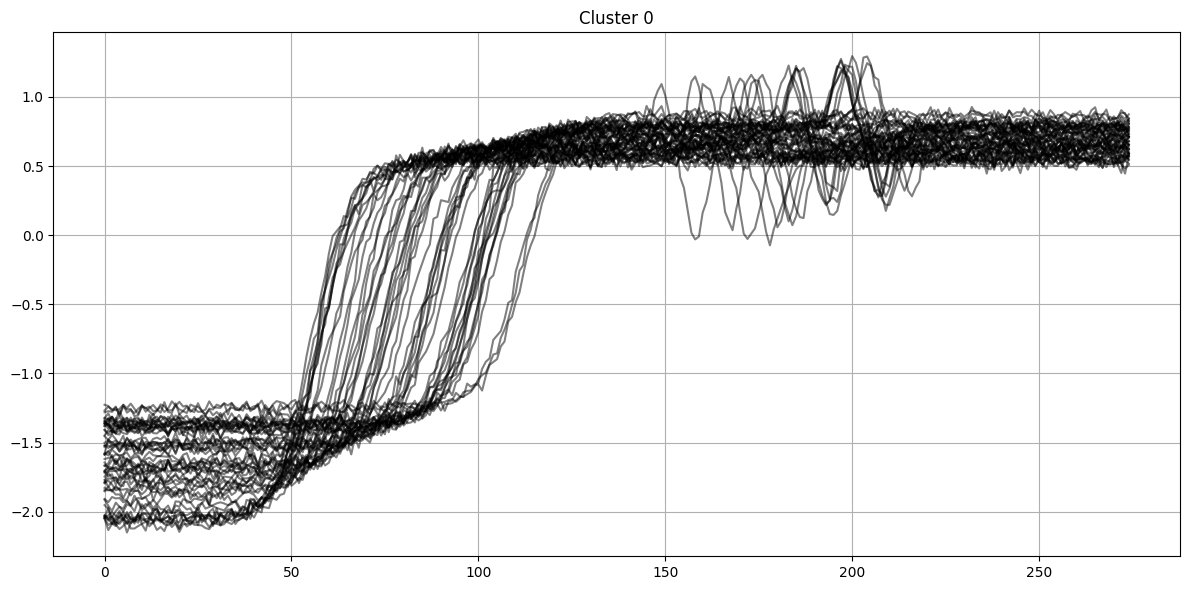

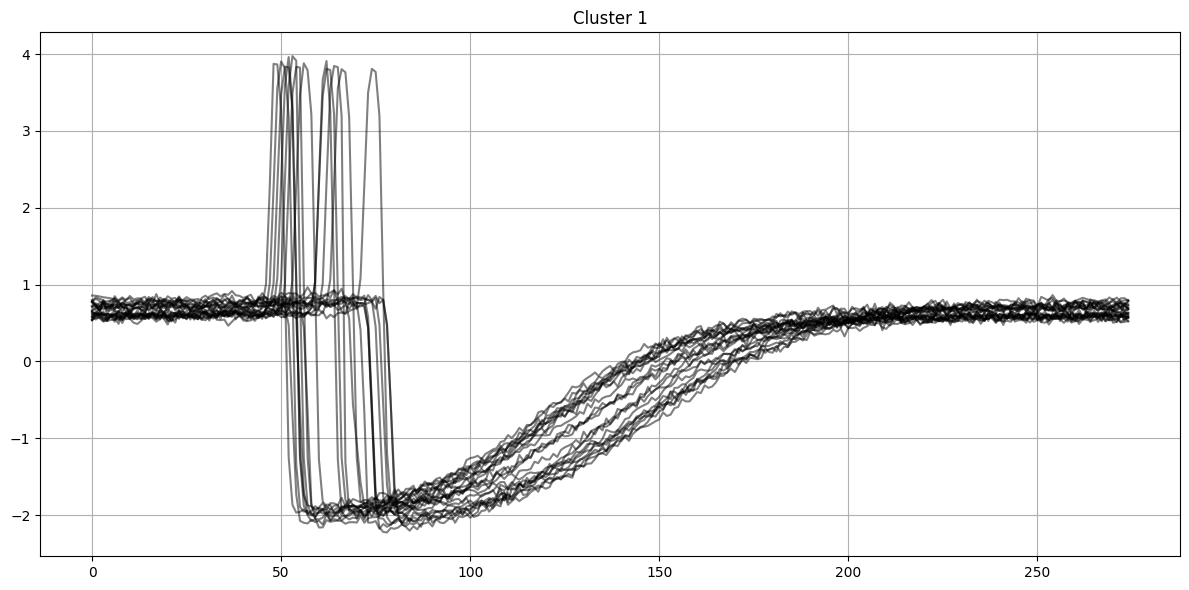

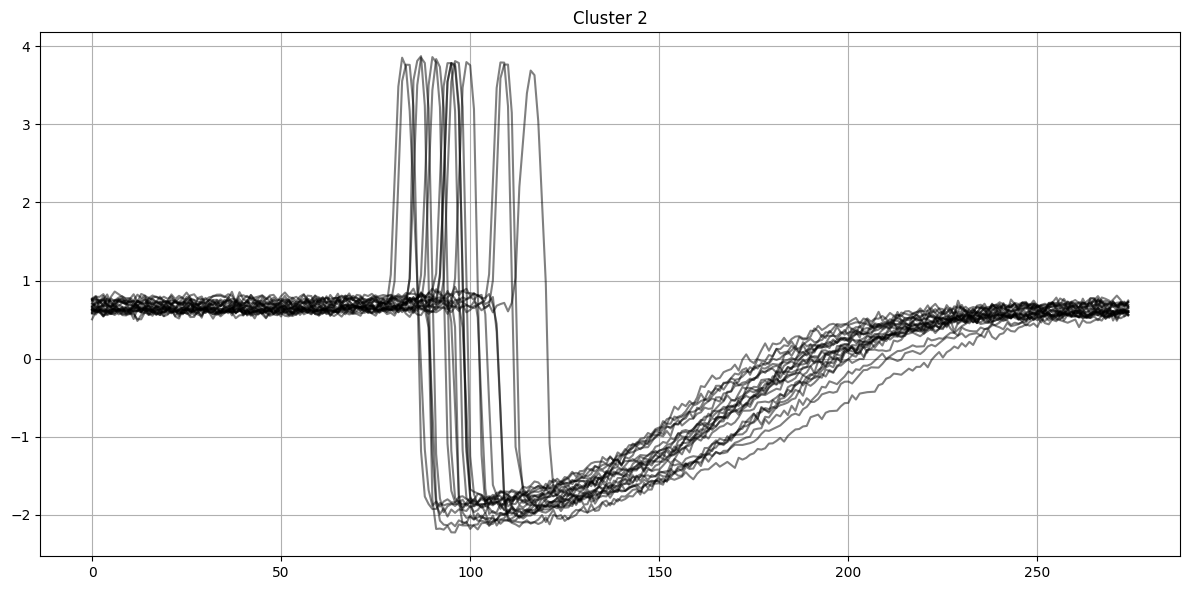

In [74]:
# 17. Cluster Visualization for Time Series - Visualize time series clusters
labels = model.labels_
unique_labels = set(labels)
for label in unique_labels:
    plt.figure(figsize=(12, 6))
    plt.title(f"Cluster {label}")
    for i in range(len(labels)):
        if labels[i] == label:
            plt.plot(X_train[i].ravel(), "k-", alpha=0.5)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [77]:
# 20. Hypothesis Testing - Perform a t-test for comparing SO2 levels in two different cities
from scipy import stats
city1_data = df[df['City/Town/Village/Area'] == 'City1']['SO2'].dropna()
city2_data = df[df['City/Town/Village/Area'] == 'City2']['SO2'].dropna()
t_statistic, p_value = stats.ttest_ind(city1_data, city2_data)

<Figure size 1200x600 with 0 Axes>

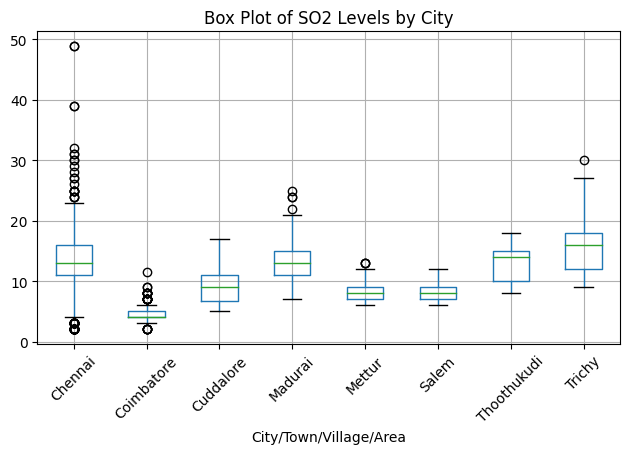

In [78]:
# 21. Box Plot - Visualize the distribution of SO2 levels by city
plt.figure(figsize=(12, 6))
df.boxplot(column='SO2', by='City/Town/Village/Area')
plt.title('Box Plot of SO2 Levels by City')
plt.suptitle("")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [79]:
# 22. Time Series Decomposition - Decompose time series data into trend, seasonality, and residual
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['SO2'], model='additive', period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [80]:
# 23. Anomaly Detection - Use the Z-score for anomaly detection in SO2 levels
from scipy.stats import zscore
z_scores = zscore(df['SO2'].dropna())
anomaly_indices = z_scores[z_scores > 3]  # Choose an appropriate threshold

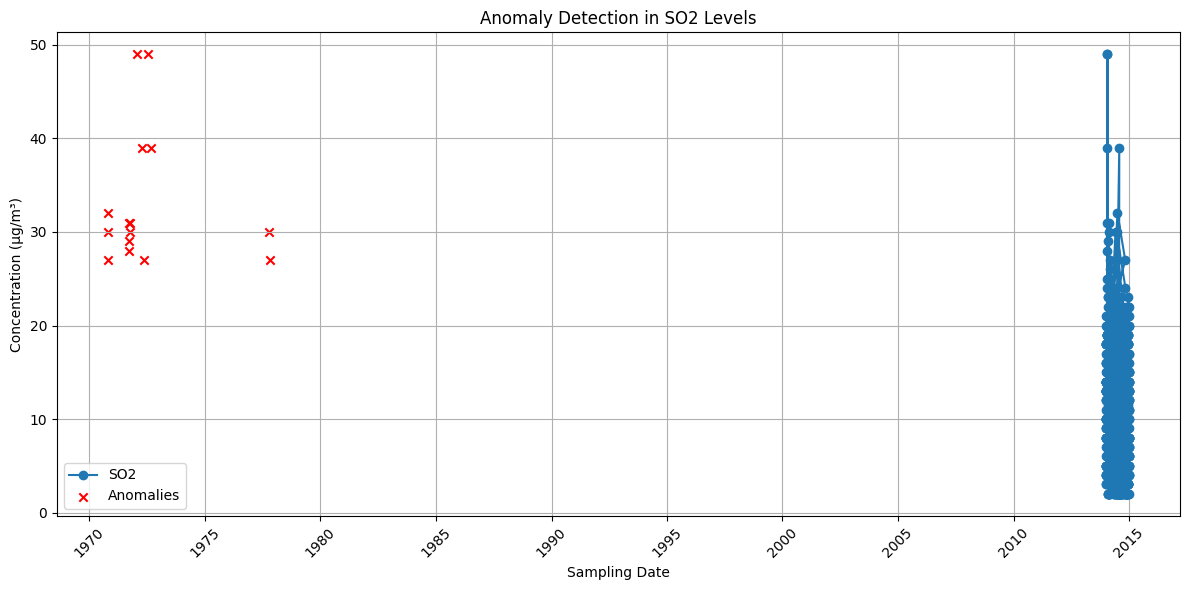

In [81]:

# 24. Anomaly Visualization - Visualize detected anomalies
anomalies = df['SO2'].iloc[anomaly_indices.index]
plt.figure(figsize=(12, 6))
plt.plot(df['Sampling Date'], df['SO2'], label='SO2', marker='o')
plt.scatter(anomalies.index, anomalies, c='red', label='Anomalies', marker='x')
plt.title('Anomaly Detection in SO2 Levels')
plt.xlabel('Sampling Date')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

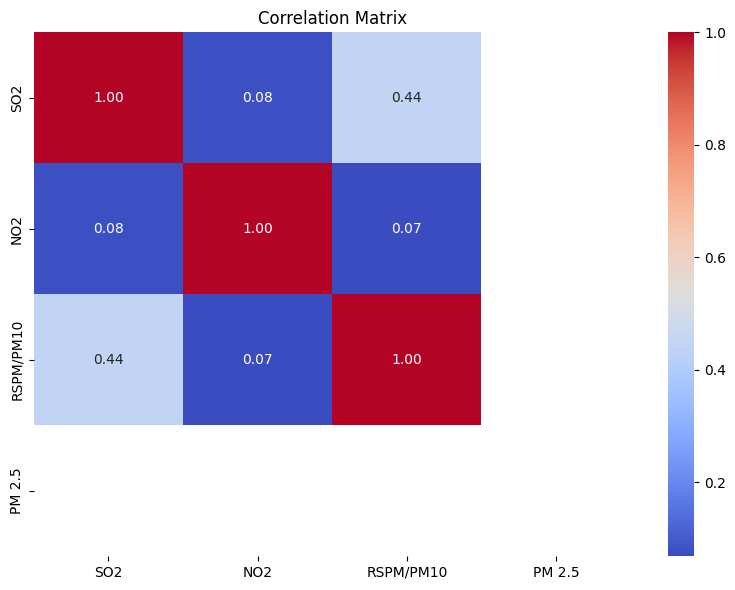

In [82]:
# 25. Correlation Matrix - Compute and visualize the correlation matrix of variables
correlation_matrix = df[['SO2', 'NO2', 'RSPM/PM10', 'PM 2.5']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [84]:
from scipy.stats import ttest_ind

location1_data = df[df['Location of Monitoring Station'] == 'Location 1']
location2_data = df[df['Location of Monitoring Station'] == 'Location 2']

t_stat, p_value = ttest_ind(location1_data['SO2'], location2_data['SO2'])
if p_value < 0.05:
    print("There is a significant difference in SO2 levels between Location 1 and Location 2.")


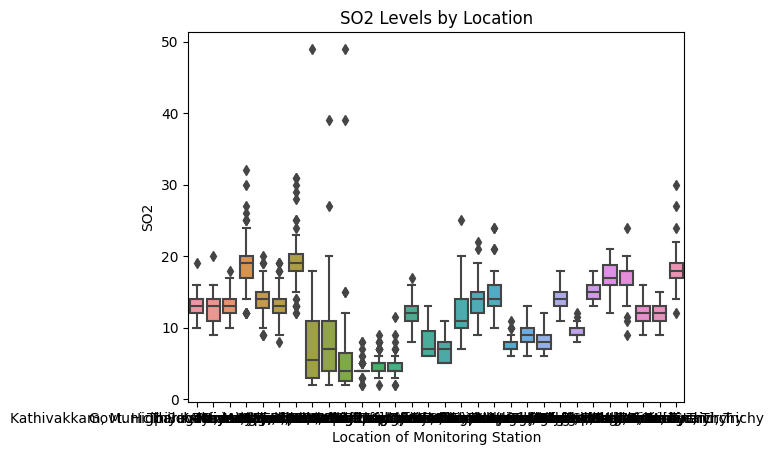

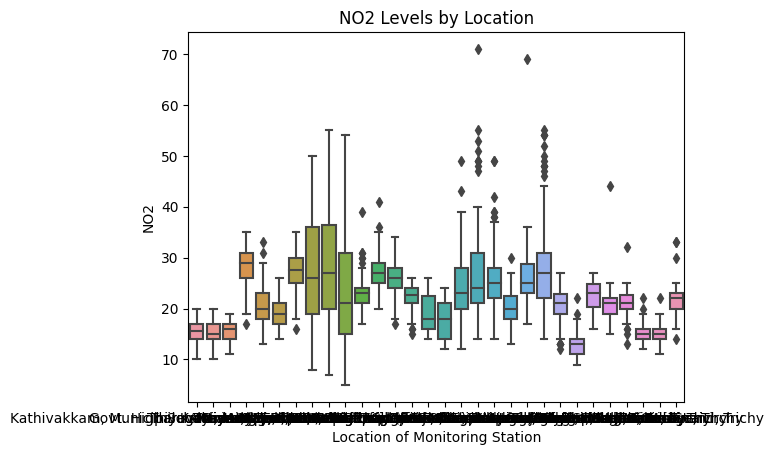

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Location of Monitoring Station', y='SO2', data=df)
plt.title('SO2 Levels by Location')
plt.show()

sns.boxplot(x='Location of Monitoring Station', y='NO2', data=df)
plt.title('NO2 Levels by Location')
plt.show()


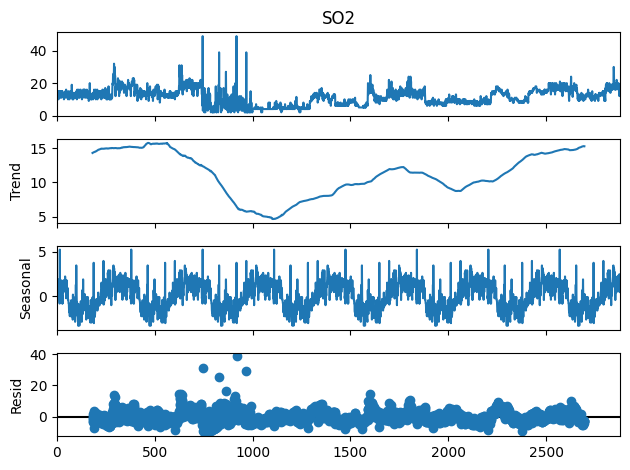

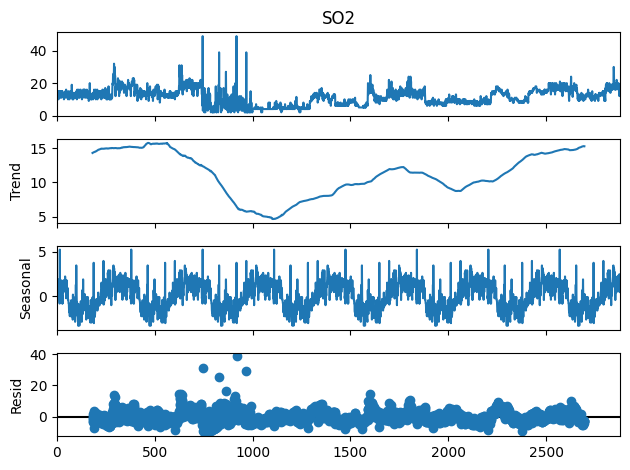

In [88]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['SO2'], model='additive', period=365)
result.plot()


Text(0.5, 1.0, 'Air Quality Parameter Correlation Heatmap')

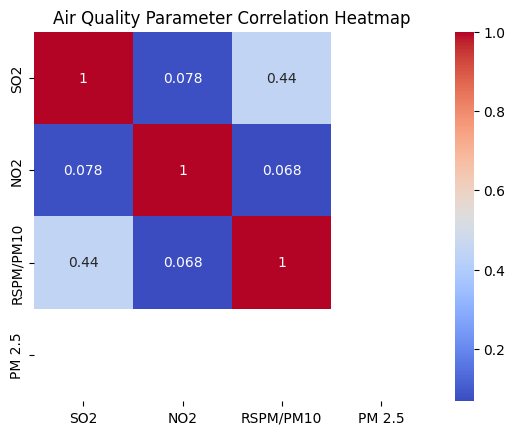

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['SO2', 'NO2', 'RSPM/PM10', 'PM 2.5']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Air Quality Parameter Correlation Heatmap')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


<Axes: xlabel='SO2', ylabel='NO2'>

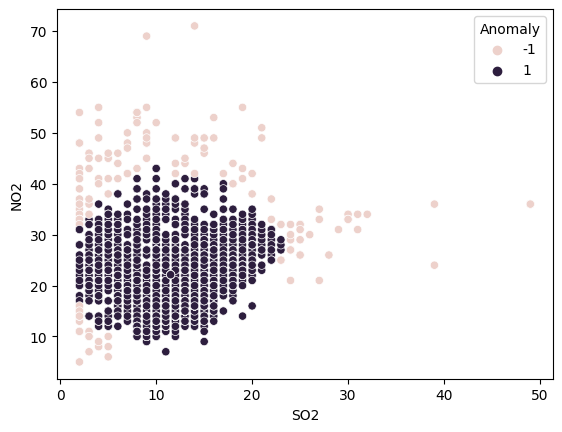

In [92]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly'] = clf.fit_predict(df[['SO2', 'NO2']])

# Visualize anomalies
sns.scatterplot(x='SO2', y='NO2', hue='Anomaly', data=df)


In [93]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(df[['SO2', 'NO2']])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [97]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with your data
# Replace 'df' with your actual DataFrame name

# Group the data by 'City/Town/Village/Area' and calculate the mean SO2 concentration
average_so2_by_city = df.groupby('City/Town/Village/Area')['SO2'].mean()

# Print the result
print(average_so2_by_city)


City/Town/Village/Area
Chennai        13.009509
Coimbatore      4.564857
Cuddalore       8.983129
Madurai        13.319728
Mettur          8.429268
Salem           8.114504
Thoothukudi    12.979544
Trichy         15.262968
Name: SO2, dtype: float64
